<a href="https://colab.research.google.com/github/aktrikx/DSprojects/blob/main/Coronavirus__Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required modules
# !pip install plotly==4.14.3
%matplotlib inline
import pandas as pd
import plotly as plt
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
#Importing Data named as data.csv
#For google colab
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Prexa/data.csv')

Mounted at /content/drive


In [ ]:
#Checking Data
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [ ]:
#Checking the summary of data
data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [ ]:
#From above summary of data we see that columns "cases" and "deaths" have negative values so, we will remove them
data=data[(data['cases']>=0) & (data['deaths']>=0)]

In [ ]:
#Data size
data.shape

(61875, 12)

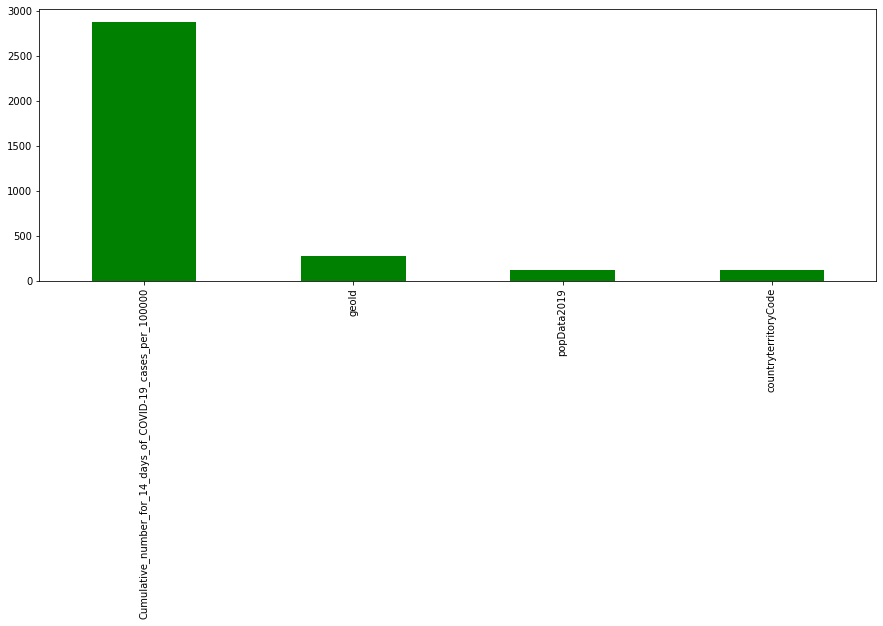

In [ ]:
#Missing Data
#Bar plot of missing data
missing= data.isnull().sum()
missing=(missing[missing>0]).sort_values(ascending=False)
plt.figure(figsize=(15,5))
missing.plot.bar(color='green')

In [ ]:
# missing.sum()/data.shape[0]*data.shape[1]
((missing.sum()).sum()/(data.shape[0]*data.shape[1]))*100

0.4575084175084175

In [ ]:
#Number of missing data
data.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           122
popData2019                                                    122
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2878
dtype: int64

In [ ]:
#Checking the countries which has missing data
data[data['popData2019'].isnull()].countriesAndTerritories.unique()

array(['Cases_on_an_international_conveyance_Japan', 'Wallis_and_Futuna'],
      dtype=object)

In [ ]:
# removing the column "Cases_on_an_international_conveyance_Japan" because there is no countries And Territories named as this
data=data[data['countriesAndTerritories']!='Cases_on_an_international_conveyance_Japan']

In [ ]:
#filing the missing popData2019 of "Wallis_and_Futuna" as population as 11661(from internet source), other two columns are not inportant so left as it is
list_of_index=list(data[data.countriesAndTerritories=='Wallis_and_Futuna'].index)
for i in list_of_index:
    data.at[i,'popData2019']=11661
# data=df2[~data.popData2019.isnull()]
data.rename(columns={'dateRep':'date'},inplace=True)

In [ ]:
#Changing format of column dateRep to datetime and changing column name as date
data.rename(columns={'dateRep':'date'},inplace=True)
data.date=pd.to_datetime(data['date'])

In [ ]:
#Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61836 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   date                                                        61836 non-null  datetime64[ns]
 1   day                                                         61836 non-null  int64         
 2   month                                                       61836 non-null  int64         
 3   year                                                        61836 non-null  int64         
 4   cases                                                       61836 non-null  int64         
 5   deaths                                                      61836 non-null  int64         
 6   countriesAndTerritories                                     61836 non-null  object        
 7   geoId                 

In [ ]:
#Checking unique countries and Territories
data['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fal

In [ ]:
#Number countries and Territories
len(data['countriesAndTerritories'].unique())

213

In [ ]:
data.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [ ]:
#Funtion for Groupby
def continent_country_groupby_maker(df,columns_name):
    """
    df: pandas dataframe 
    columns_name : name of the columns to perform groupby
    """
    list_of_info=[]
    df_groupby=df.groupby(columns_name)
    for i in df_groupby.groups.keys():
        if columns_name=='continentExp':
            list_of_info+=[[i,df_groupby.get_group(i).deaths.sum(),df_groupby.get_group(i).cases.sum(),
                      df_groupby.get_group(i).drop_duplicates('countriesAndTerritories').popData2019.sum()]]
        else:
            list_of_info+=[[i,df_groupby.get_group(i).deaths.sum(),df_groupby.get_group(i).cases.sum(),
                          df_groupby.get_group(i).popData2019.mean()]]
    df_info=pd.DataFrame(list_of_info)
    df_info.columns=[columns_name,'deaths','cases','population']
    df_info['deaths_per_population_%']=df_info['deaths']*100/df_info['population']
    df_info['cases_per_population_%']=df_info['cases']*100/df_info['population']
    df_info['deaths_per_cases_%']=df_info['deaths']*100/df_info['cases']
    return df_info

In [ ]:
#Function for plot
def bar_graph_maker(df,context:dict,multiplier=100,ascending=False,orientation='h'):
    df.sort_values(context.get('columns_name'),ascending=ascending,inplace=True)
    
    labels=df[context.get('target_columns')].str.replace('_',' ').head(10).values.tolist()
    
    values=list(round(df[context.get('columns_name')].head(10)*multiplier,2))
    
    fig = go.Figure([go.Bar(x=labels, y=values,text=values,
                textposition='auto',)])
    
    mean_value=round(df[context.get('columns_name')].mean()*multiplier,2)
    
    fig.update_traces( marker_line_color='rgb(255,255,255,0)',marker_color=f'rgb({random. randint(1,250)},{random. randint(0,100)},{random. randint(100,200)})',
                      marker_line_width=1.5, opacity=0.6)
    fig.layout.update(title_text=context.get('title'))
    fig.layout.update(
        xaxis_tickfont_size=14,
        yaxis=dict(
            title=context.get('y_axix_title'),
            titlefont_size=16,
            tickfont_size=14,
        ),
        xaxis=dict(
            title=context.get('x_axix_title'),
            titlefont_size=16,
            tickfont_size=14,
        ),
        bargap=0.15,
        bargroupgap=0.1
    )
    fig.add_hline(y=mean_value, line_dash="dot",
                  annotation_text=f"Mean value : {mean_value}", 
                  annotation_position="bottom right",
                 fillcolor="red")
    return fig.show()

def pie_graph_maker(df,context:dict,ascending=False):
    df.sort_values(context.get('columns_name'),ascending=ascending,inplace=True)
    
    labels=df[context.get('target_columns')].str.replace('_',' ').head(10).values.tolist()
    
    values=list(round(df[context.get('columns_name')].head(10),2))
    
    fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=.3,pull=[.2, 0, 0.05, 0])])
    
    mean_value=round(df[context.get('columns_name')].mean(),2)
    
    fig.layout.update(title_text=context.get('title'))

    return fig.show()

In [ ]:
#Top ten highest recorded deaths worldwide
df_groupby_date=data.groupby('date').sum()
df_groupby_date['date']=list(df_groupby_date.index.strftime('%d , %b %Y'))
context={'columns_name': 'deaths',
        'title':'Top ten highest recorded deaths in a single day worldwide',
        'y_axix_title':'Deaths',
        'x_axix_title':'Date',
        'target_columns':'date'}
bar_graph_maker(df_groupby_date,context,ascending=False,multiplier=1)

In [ ]:
#Top ten highest recorded cases worldwide
context={'columns_name': 'cases',
        'title':'Top ten highest recorded cases in a single day worldwide',
        'y_axix_title':'Cases',
        'x_axix_title':'Date',
        'target_columns':'date'}
bar_graph_maker(df_groupby_date,context,ascending=False,multiplier=1)

In [ ]:
#Function to map month values to name
def month_data_maker():
    df=data
    df['month']=df['month'].astype(str)
    month_nums = {'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July',
                              '8':'August','9':'September','10':'October','11':'November','12':'December'}
    df['month'] = df['month'].apply(lambda x:month_nums.get(x))
    df['month_year']=df['month']+' '+df['year'].astype(str)
    df_groupby_month_year=df.groupby('month_year')
    df_groupby_month_year=df.groupby('month_year').sum()
    df_groupby_month_year['month_year']=list(df_groupby_month_year.index)
    return df_groupby_month_year
#Top ten highest recorded deaths in a single month worldwide
df_groupby_month_year=month_data_maker()
context={'columns_name': 'deaths',
        'title':'Top ten highest recorded deaths in a single month worldwide',
        'y_axix_title':'Deaths',
        'x_axix_title':'Month',
        'target_columns':'month_year'}
bar_graph_maker(df_groupby_month_year,context,ascending=False,multiplier=1)

In [ ]:
#Top ten highest recorded cases in a single month worldwide
context={'columns_name': 'cases',
        'title':'Top ten highest recorded cases in a single month worldwide',
        'y_axix_title':'Cases',
        'x_axix_title':'Month',
        'target_columns':'month_year'}
bar_graph_maker(df_groupby_month_year,context,ascending=False,multiplier=1)

In [ ]:
df_continent_wise_info=continent_country_groupby_maker(data,'continentExp')
df_country_wise_info=continent_country_groupby_maker(data,'countriesAndTerritories')
df_country_wise_info.sort_values('deaths_per_population_%',inplace=True)
# countries with lowest deaths per population 
df_country_wise_info[df_country_wise_info['deaths_per_population_%']==0].shape

(21, 7)

In [ ]:
#There are 21 countries with zero deaths

In [ ]:
# Proportion of top(10/20/30/remaining)countries in total deaths
df_country_wise_info.sort_values('deaths',ascending=False,inplace=True)
top_ten_deaths=df_country_wise_info[:10]['deaths'].sum()
next_top_30_deaths=df_country_wise_info[10:40]['deaths'].sum()
next_top_60_deaths=df_country_wise_info[40:100]['deaths'].sum()
remaining_countires=df_country_wise_info[100:]['deaths'].sum()

labels=['Top 10 countries as per deaths','Next 30 countries as per deaths',
        'Next 60 countries as per deaths','Remaining Countries']
values=[top_ten_deaths,next_top_30_deaths,next_top_60_deaths,remaining_countires]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=.3,pull=[.02, 0, 0.05, 0])])
fig.update_layout(title_text='Proportion of Deaths as per Top countries')

In [ ]:
# Proportion of top(10/20/30/remaining) countries in total cases
df_country_wise_info.sort_values('cases',ascending=False,inplace=True)
top_ten_deaths=df_country_wise_info[:10]['cases'].sum()
next_top_30_deaths=df_country_wise_info[10:40]['cases'].sum()
next_top_60_deaths=df_country_wise_info[40:100]['cases'].sum()
remaining_countires=df_country_wise_info[100:]['cases'].sum()

labels=['Top 10 countries as per cases','Next 30 countries as per cases',
        'Next 60 countries as per cases','Remaining Countries']
values=[top_ten_deaths,next_top_30_deaths,next_top_60_deaths,remaining_countires]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=.3,pull=[.02, 0, 0.05, 0])])
fig.update_layout(title_text='Proportion of Cases as per Top countries')

In [ ]:
#Top ten Countries or Territories with highest deaths
context={'columns_name': 'deaths',
        'title':'Top ten Countries or Territories with highest deaths',
        'y_axix_title':'Deaths',
        'x_axix_title':'Country',
        'target_columns':'countriesAndTerritories'}
bar_graph_maker(df_country_wise_info,context,multiplier=1)

In [ ]:
#Top ten Countries or Territories with highest deaths per polulation
context={'columns_name': 'deaths_per_population_%',
        'title':'Top ten Countries or Territories with highest deaths per lakhs population',
        'y_axix_title':'Deaths per lakh population',
        'x_axix_title':'Country',
        'target_columns':'countriesAndTerritories'}
bar_graph_maker(df_country_wise_info,context,multiplier=1000)

In [ ]:
#Top ten Countries or Territories with highest cases

context={'columns_name': 'cases',
        'title':'Top ten Countries or Territories with highest deaths',
        'y_axix_title':'Deaths',
        'x_axix_title':'Country',
        'target_columns':'countriesAndTerritories'}
bar_graph_maker(df_country_wise_info,context,multiplier=1)

In [ ]:
#Top ten Countries or Territories with higest cases per population
context={'columns_name': 'cases_per_population_%',
        'title':'Top ten Countries or Territories with highest cases per lakh population',
        'y_axix_title':'Cases/Population in lakhs',
        'x_axix_title':'Country',
        'target_columns':'countriesAndTerritories'}
bar_graph_maker(df_country_wise_info,context,multiplier=1000)

In [ ]:
#Top ten Countries or Territories with lowest cases per lakh polulation
context={'columns_name': 'cases_per_population_%',
        'title':'Top ten countries with lowest cases per lakh population',
        'y_axix_title':'Cases/Population per lakhs',
        'x_axix_title':'Country',
        'target_columns':'countriesAndTerritories'}
bar_graph_maker(df_country_wise_info,context,ascending=True,multiplier=1000)

In [ ]:
#Top ten countries with slowing deaths rate as per 14 Dec, 2020

data_groupby_contry=data.groupby("countriesAndTerritories")
for_correlation_info=[]
info_for_most_trending_cases_and_deaths=[]
for i in data_groupby_contry.groups.keys():
    df_country=data_groupby_contry.get_group(i)
    df_country.sort_values('date',inplace=True)
    df_country['total_cases']=df_country.cases.cumsum()
    df_country['total_deaths']=df_country.cases.cumsum()
    df_country['cases_ewm_14']=df_country['cases'].ewm(span=14, adjust=False).mean()
    df_country['cases_ewm_25']=df_country['cases'].ewm(span=25, adjust=False).mean()
    df_country['deaths_ewm_14']=df_country['deaths'].ewm(span=14, adjust=False).mean()
    df_country['deaths_ewm_25']=df_country['deaths'].ewm(span=25, adjust=False).mean()
    df_country['diff_deaths']=df_country['deaths_ewm_14']-df_country['deaths_ewm_25']
    df_country['diff_cases']=df_country['cases_ewm_14']-df_country['cases_ewm_25']
    for_correlation_info+=[df_country]
    info_for_most_trending_cases_and_deaths+=[df_country.iloc[-1].values.tolist()]

dataframe_for_correlation=pd.concat(for_correlation_info)

info_for_most_trending_cases_and_deaths_columns=(df_country.columns)
trending_dataframe=pd.DataFrame(columns=info_for_most_trending_cases_and_deaths_columns,
                                data=info_for_most_trending_cases_and_deaths)

context={'columns_name': 'diff_deaths',
        'title':f'Top ten countries with slowing deaths rate as per {trending_dataframe.date.iloc[0].strftime("%d ,%b %Y")}',
        'y_axix_title':'Difference between EWM of 14 days and 25 days',
        'x_axix_title':'Country',
        'target_columns':'countriesAndTerritories'}
bar_graph_maker(trending_dataframe,context,ascending=True,multiplier=1)

In [ ]:
#Correlation between the number of cases Vs Deaths continentwise
corr_worldwide=data[['cases','deaths']].corr()
groups_conti=data.groupby('continentExp')
fig = make_subplots(
    rows=1, cols=6, subplot_titles=['Worldwide']+list(groups_conti.groups.keys())
)
fig.add_trace(
             go.Heatmap(x =['cases','deaths'] , 
                        z = corr_worldwide,
                        coloraxis = "coloraxis"),1,1)
for i,j  in enumerate(groups_conti.groups.keys()):
        uniform_data=groups_conti.get_group(j)[['cases','deaths']].corr()
        fig.add_trace(
         go.Heatmap(x =['cases','deaths'] , z = uniform_data, coloraxis = "coloraxis"),1,i+2)
fig.update_layout(title ='Correlation between the number of cases Vs Deaths continentwise',width=950)
# fig.update_layout(title_text="Customizing Subplot Axes", )
fig

In [ ]:
#Continent wise share of number of total deaths
context={'columns_name': 'deaths',
        'title':'Continent wise share of death',
        'target_columns':'continentExp'}
pie_graph_maker(df_continent_wise_info,context,ascending=True)

In [ ]:
#Continent wise share of number of total cases
context={'columns_name': 'cases',
        'title':'Continent wise share of cases',
        'target_columns':'continentExp'}
pie_graph_maker(df_continent_wise_info,context,ascending=True)

In [ ]:
#Continent wise cases per lakh population
context={'columns_name': 'cases_per_population_%',
        'title':'Continent wise cases per lakh population',
        'y_axix_title':'Cases/Population per lakh population',
        'x_axix_title':'Continent',
        'target_columns':'continentExp'}
bar_graph_maker(df_continent_wise_info,context,ascending=True,multiplier=1000)

In [ ]:
#Continent wise Deaths per lakh population
context={'columns_name': 'deaths_per_population_%',
        'title':'Continent wise Deaths per lakhs population',
        'y_axix_title':'Deaths/Population per lakhs',
        'x_axix_title':'Continent',
        'target_columns':'continentExp'}
bar_graph_maker(df_continent_wise_info,context,ascending=True,multiplier=1000)

# Major Findings:
#Note: All the findings are of duration December 2019 to December 2020 
# 1) Data consists of total number of Cases and Deaths due to Covid 19 from Dec, 2019 to Dec, 2020. Data of 213 countries are there.
# 2) Highest number of cases and deaths recorded on a single day was on 12 Nov, 2020 and 12 Feb, 2020 respectively.
# 3) On Nov, 2020, both the highest number of cases and deaths in a single month was recorded.
# 4) There were 21 countries with zero deaths.
# 5) Top ten countries(deathwise) shared about 66% of the the total number of deaths worldwide and top ten countries(casewise) shared about 65% of the the total number of cases worldwide.
# 6) Out of all countries and Territories, United States of America was recorded to have the highest total number of deaths (around 299K) and the highest total number of cases (around 16 Million ).
# 7) Out of all countries and Territories ,the highest number of cases per lakh population was in Andorra and lowest was in Vanuatu.
# 8) As per 14 Dec, 2020, France was the country with highest slowing rates of deaths.
# 9) Continent wise, America had the proportion of around 48% of total deaths and had 43% of total cases in the world.